#Car Purchase Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

#Upload CSV Data

In [3]:
uploaded = files.upload()

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data.csv


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
12/12 [==============================] - 3s 69ms/step - loss: 0.2062 - val_loss: 0.2239
Epoch 2/25
12/12 [==============================] - 0s 6ms/step - loss: 0.1676 - val_loss: 0.1821
Epoch 3/25
12/12 [==============================] - 0s 9ms/step - loss: 0.1339 - val_loss: 0.1458
Epoch 4/25
12/12 [===========

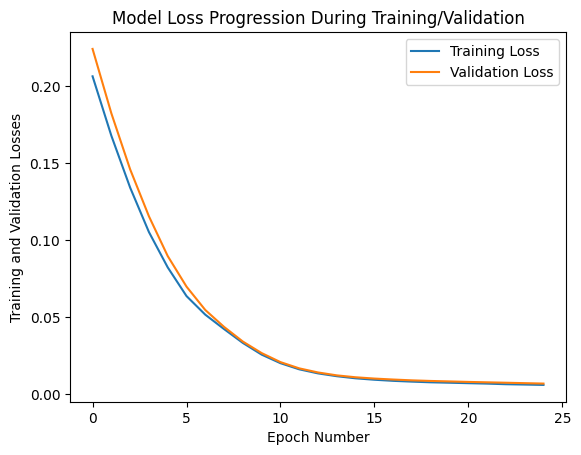

In [4]:
#Print the data if you want
# uploaded
fileName = next(iter(uploaded))
car_df = pd.read_csv(fileName, encoding='ISO-8859-1')
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
y = car_df['Car Purchase Amount']
y.shape
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=25, batch_size=25,  verbose=1, validation_split=0.2)

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


#Predict

In [5]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth

X_Testing = np.array([[1, 50, 50000, 10000, 60000]])
y_predict = model.predict(X_Testing)
y_predict.shape
print('Expected Purchase Amount=', y_predict[:,0])

1/1 [==============================] - 0s 83ms/step
Expected Purchase Amount= [24730.662]


#Save this model

In [6]:
import os
directory = os.path.join(os.getcwd(), 'car_predict_models')
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
model.save(model_path)


# Download the model locally

In [7]:
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>